In [ ]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [ ]:
X, y = fetch_olivetti_faces(return_X_y=True)

In [ ]:
X.shape

(400, 4096)

In [ ]:
print("Number of people:", np.unique(y))

Number of people: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [ ]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=40, random_state=42)
for train_index, test_index in sss.split(X,y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

sss = StratifiedShuffleSplit(n_splits=1, test_size=80, random_state=42)
for train_index, val_index in sss.split(X_train,y_train):
  X_train, X_val = X_train[train_index], X_train[val_index]
  y_train, y_val = y_train[train_index], y_train[val_index]

print("Test size shape: ", X_test.shape)
print("Train size shape: ", X_train.shape)
print("Val size shape: ", X_val.shape)


Test size shape:  (40, 4096)
Train size shape:  (280, 4096)
Val size shape:  (80, 4096)


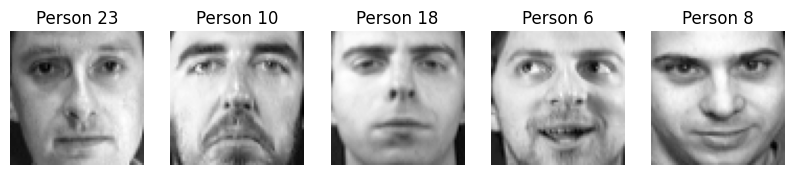

In [ ]:
X_photos = X_train[:5].copy()
X_photos = X_photos.reshape(5,64,64)
index = 1
plt.figure(figsize=(10,10))
for photo in X_photos:
  plt.subplot(1,5,index)
  plt.axis('off')
  plt.title(f"Person {y_train[index-1]}")
  plt.imshow(photo, cmap='gray')
  index = index + 1
plt.show()

In [ ]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None,
                              title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2)

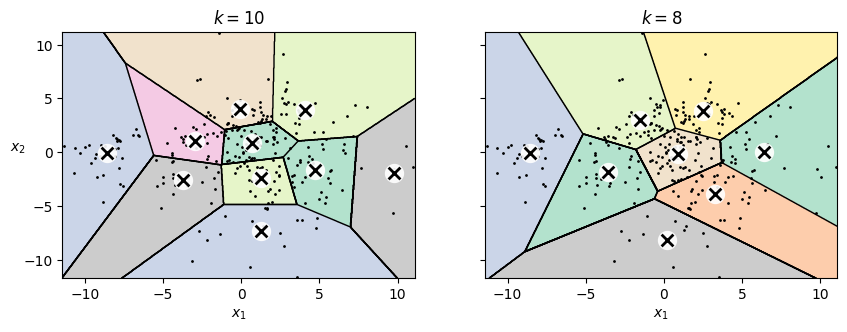

In [ ]:
kmeans_k3 = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans_k8 = KMeans(n_clusters=8, n_init=10, random_state=42)
X_pca = X_train.copy()
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)
plot_clusterer_comparison(kmeans_k3, kmeans_k8, X_pca, "$k=10$", "$k=8$")
plt.show()

In [ ]:
kmeans_10 = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans_10.fit(X_train, y_train)
k_range = range(5,150,5)
kmeans_k = [KMeans(n_clusters = n, n_init=10, random_state=42).fit(X_train) for n in k_range]

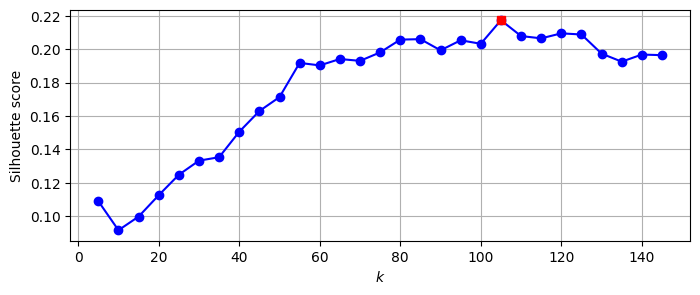

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X_train,model.labels_) for model in kmeans_k]
best_index = np.argmax(silhouette_scores)
best_score = silhouette_scores[best_index]
best_k = k_range[best_index]
plt.figure(figsize=(8, 3))
plt.plot(k_range, silhouette_scores, "bo-")
plt.xlabel("$k$")
plt.ylabel("Silhouette score")
plt.plot(best_k, best_score, "rs")
plt.grid()
plt.show()

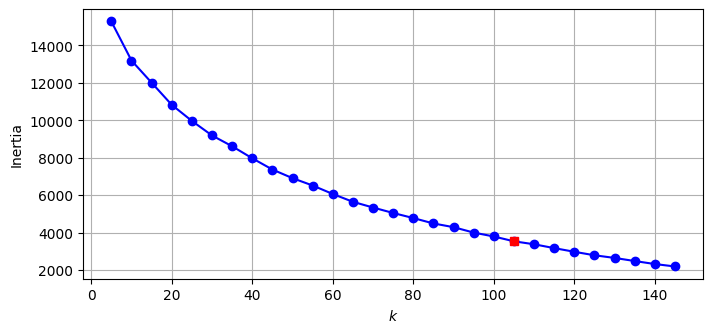

In [ ]:
inertias = [model.inertia_ for model in kmeans_k]
best_inertia = inertias[best_index]

plt.figure(figsize=(8, 3.5))
plt.plot(k_range, inertias, "bo-")
plt.xlabel("$k$")
plt.ylabel("Inertia")
plt.plot(best_k, best_inertia, "rs")
plt.grid()
plt.show()

Cluster:  0


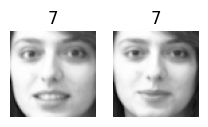

Cluster:  1


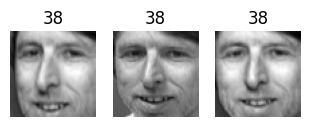

Cluster:  2


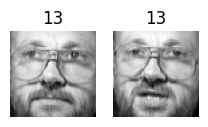

Cluster:  3


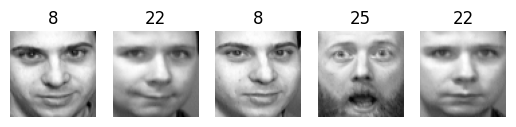

Cluster:  4


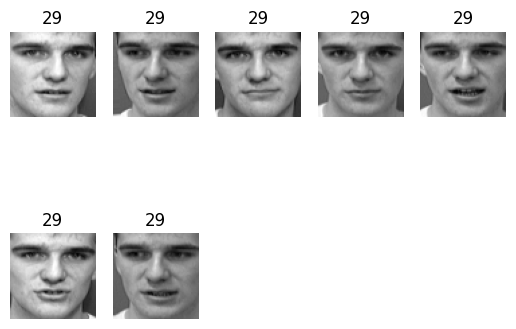

Cluster:  5


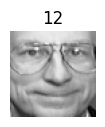

Cluster:  6


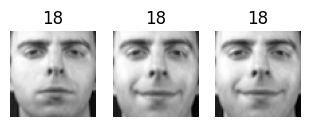

Cluster:  7


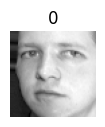

Cluster:  8


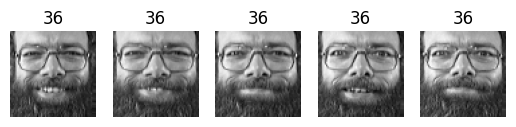

Cluster:  9


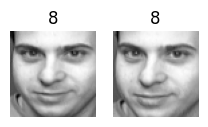

Cluster:  10


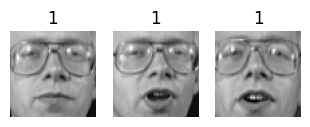

Cluster:  11


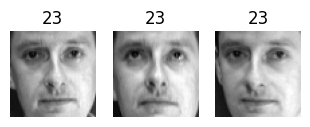

Cluster:  12


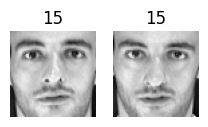

Cluster:  13


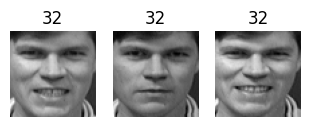

Cluster:  14


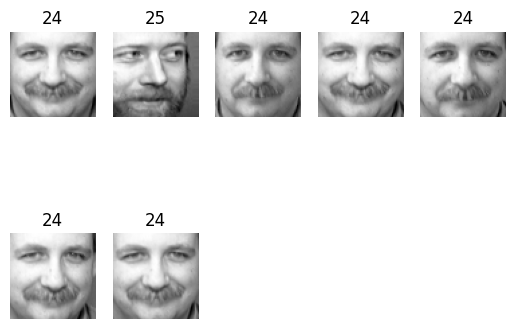

Cluster:  15


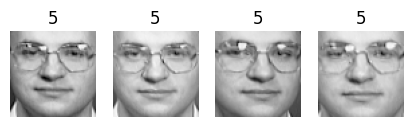

Cluster:  16


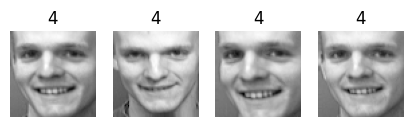

Cluster:  17


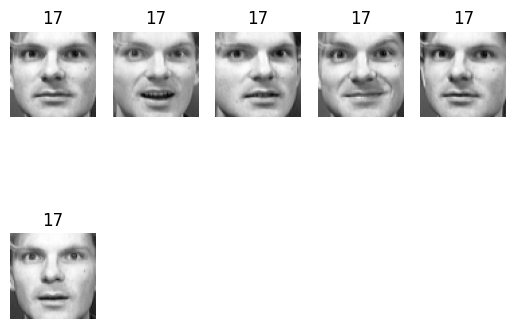

Cluster:  18


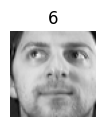

Cluster:  19


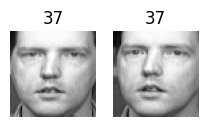

Cluster:  20


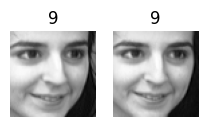

Cluster:  21


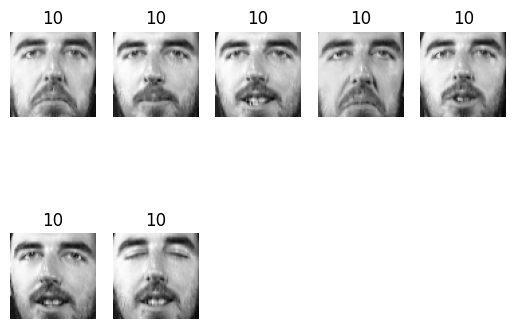

Cluster:  22


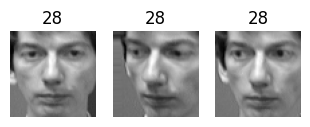

Cluster:  23


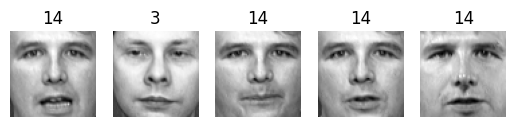

Cluster:  24


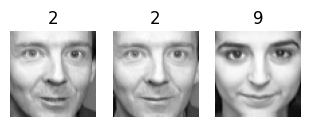

Cluster:  25


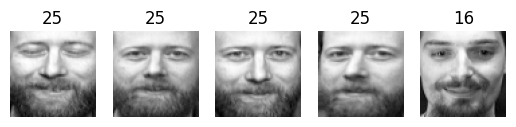

Cluster:  26


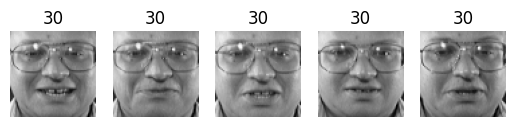

Cluster:  27


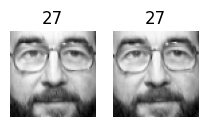

Cluster:  28


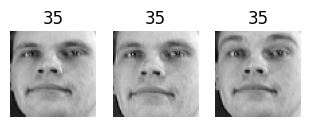

Cluster:  29


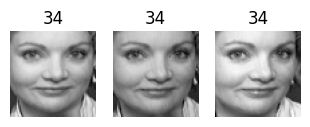

Cluster:  30


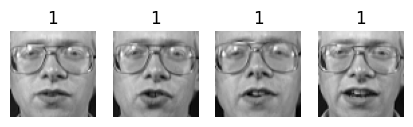

Cluster:  31


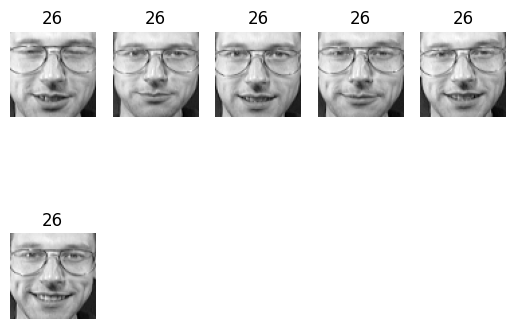

Cluster:  32


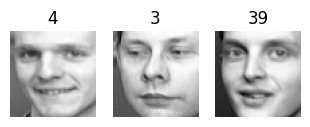

Cluster:  33


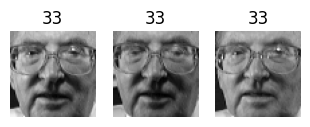

Cluster:  34


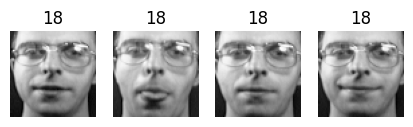

Cluster:  35


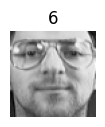

Cluster:  36


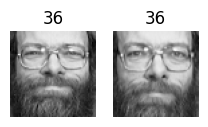

Cluster:  37


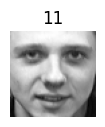

Cluster:  38


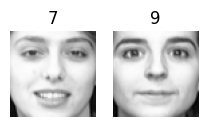

Cluster:  39


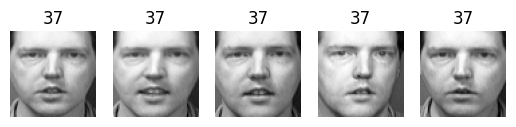

Cluster:  40


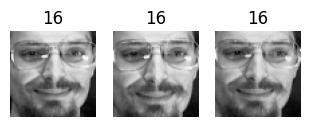

Cluster:  41


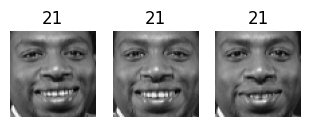

Cluster:  42


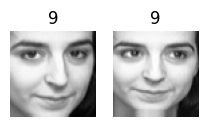

Cluster:  43


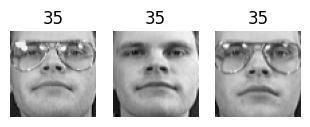

Cluster:  44


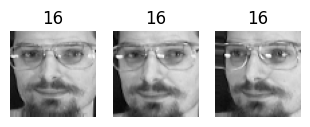

Cluster:  45


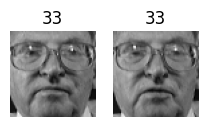

Cluster:  46


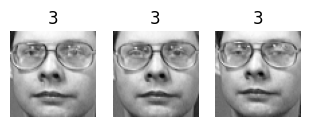

Cluster:  47


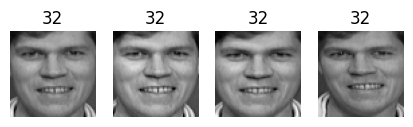

Cluster:  48


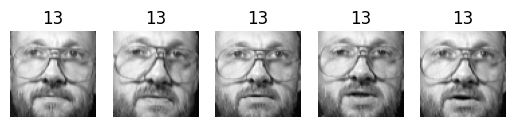

Cluster:  49


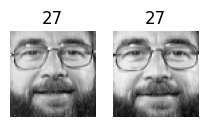

Cluster:  50


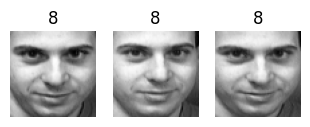

Cluster:  51


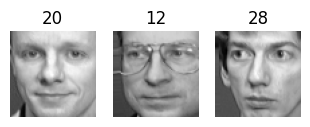

Cluster:  52


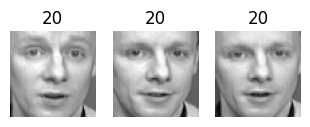

Cluster:  53


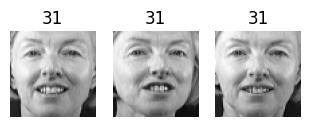

Cluster:  54


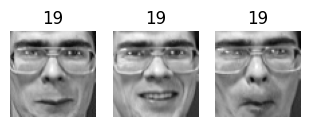

Cluster:  55


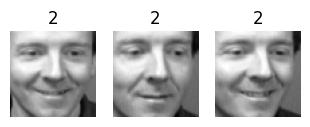

Cluster:  56


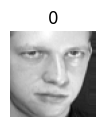

Cluster:  57


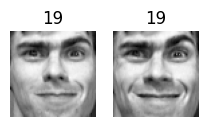

Cluster:  58


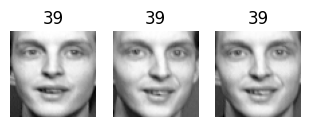

Cluster:  59


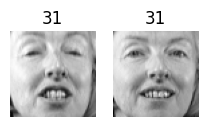

Cluster:  60


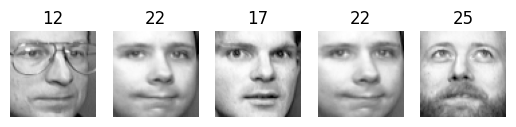

Cluster:  61


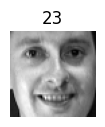

Cluster:  62


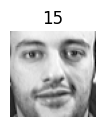

Cluster:  63


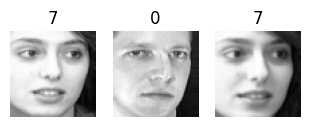

Cluster:  64


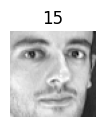

Cluster:  65


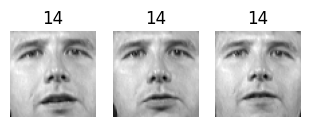

Cluster:  66


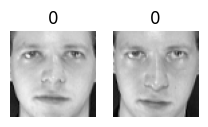

Cluster:  67


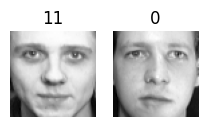

Cluster:  68


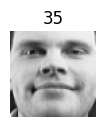

Cluster:  69


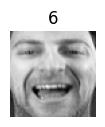

Cluster:  70


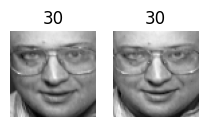

Cluster:  71


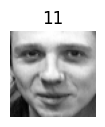

Cluster:  72


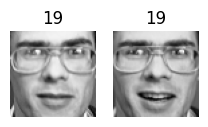

Cluster:  73


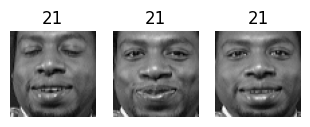

Cluster:  74


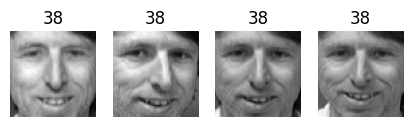

Cluster:  75


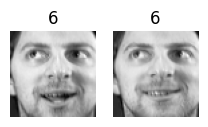

Cluster:  76


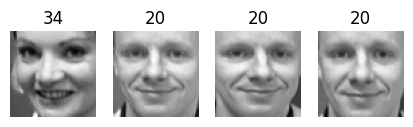

Cluster:  77


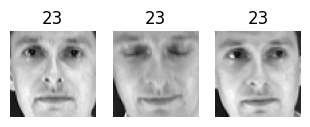

Cluster:  78


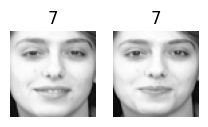

Cluster:  79


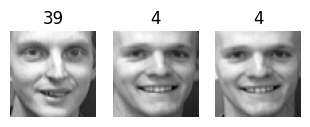

Cluster:  80


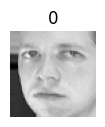

Cluster:  81


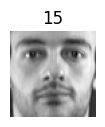

Cluster:  82


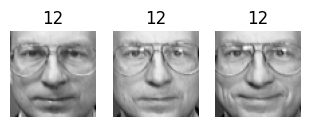

Cluster:  83


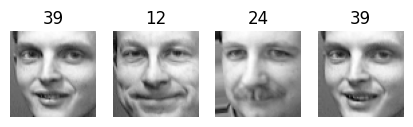

Cluster:  84


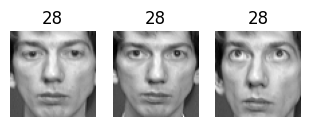

Cluster:  85


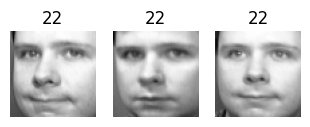

Cluster:  86


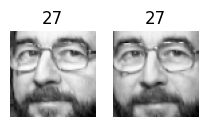

Cluster:  87


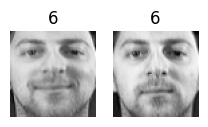

Cluster:  88


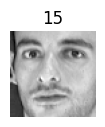

Cluster:  89


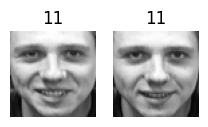

Cluster:  90


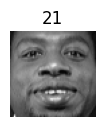

Cluster:  91


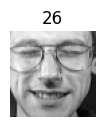

Cluster:  92


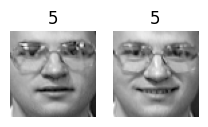

Cluster:  93


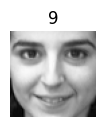

Cluster:  94


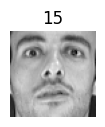

Cluster:  95


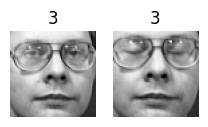

Cluster:  96


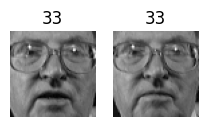

Cluster:  97


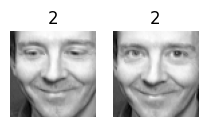

Cluster:  98


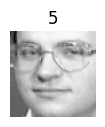

Cluster:  99


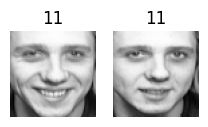

Cluster:  100


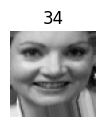

Cluster:  101


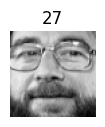

Cluster:  102


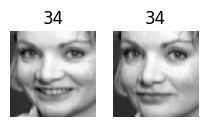

Cluster:  103


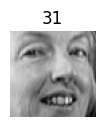

Cluster:  104


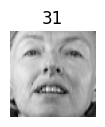

In [ ]:
def plot_faces(images, labels, n_cols=5):
  images = images.reshape(-1,64,64)
  n_rows = int(len(images)-1)//n_cols + 1
  for index,(image,label) in enumerate(zip(images,labels)):
    plt.subplot(n_rows, n_cols, index + 1)
    plt.axis('off')
    plt.title(label)
    plt.imshow(image, cmap='gray')
  plt.show()

best_model = kmeans_k[best_index]

for cluster in np.unique(best_model.labels_):
  clus = best_model.labels_==cluster
  images = X_train[clus]
  labels = y_train[clus]
  print("Cluster: ", cluster)
  plot_faces(images,labels)

## Testing dimensionality reduction with KMeans and DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
print("Score: ", clf.score(X_val,y_val))

Score:  0.6


In [ ]:
X_train_reduced = best_model.transform(X_train)
X_test_reduced = best_model.transform(X_test)
X_val_reduced = best_model.transform(X_val)

In [ ]:
from sklearn.pipeline import make_pipeline
for clusters in k_range:
  pipe = make_pipeline(
      KMeans(n_clusters=clusters, n_init=10, random_state=42),
      DecisionTreeClassifier(random_state=42)
  )
  pipe.fit(X_train,y_train)
  print(f"Score for {clusters} clusters: ", clf.score(X_val,y_val))

Score for 5 clusters:  0.6
Score for 10 clusters:  0.6
Score for 15 clusters:  0.6
Score for 20 clusters:  0.6
Score for 25 clusters:  0.6
Score for 30 clusters:  0.6
Score for 35 clusters:  0.6
Score for 40 clusters:  0.6
Score for 45 clusters:  0.6
Score for 50 clusters:  0.6
Score for 55 clusters:  0.6
Score for 60 clusters:  0.6
Score for 65 clusters:  0.6
Score for 70 clusters:  0.6
Score for 75 clusters:  0.6
Score for 80 clusters:  0.6
Score for 85 clusters:  0.6
Score for 90 clusters:  0.6
Score for 95 clusters:  0.6
Score for 100 clusters:  0.6
Score for 105 clusters:  0.6
Score for 110 clusters:  0.6
Score for 115 clusters:  0.6
Score for 120 clusters:  0.6
Score for 125 clusters:  0.6
Score for 130 clusters:  0.6
Score for 135 clusters:  0.6
Score for 140 clusters:  0.6
Score for 145 clusters:  0.6


In [ ]:
X_train_ext = np.c_[X_train, X_train_reduced]
X_test_ext = np.c_[X_test, X_test_reduced]
X_val_ext = np.c_[X_val,X_val_reduced]

In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_ext,y_train)
clf.score(X_val_ext, y_val)

0.6625